In [1]:
!pip install kaggle

In [2]:
!mkdir ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle  datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [01:45<00:00, 24.5MB/s]
100% 2.29G/2.29G [01:45<00:00, 23.4MB/s]


MessageError: Error: credential propagation was unsuccessful

In [7]:
!unzip /content/chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [8]:
import os

In [9]:
os.listdir('/content/chest_xray/train')

['PNEUMONIA', 'NORMAL']

In [10]:
os.listdir('/content/chest_xray/test')

['PNEUMONIA', 'NORMAL']

In [11]:
os.listdir('/content/chest_xray/val')

['PNEUMONIA', 'NORMAL']

In [12]:
import PIL

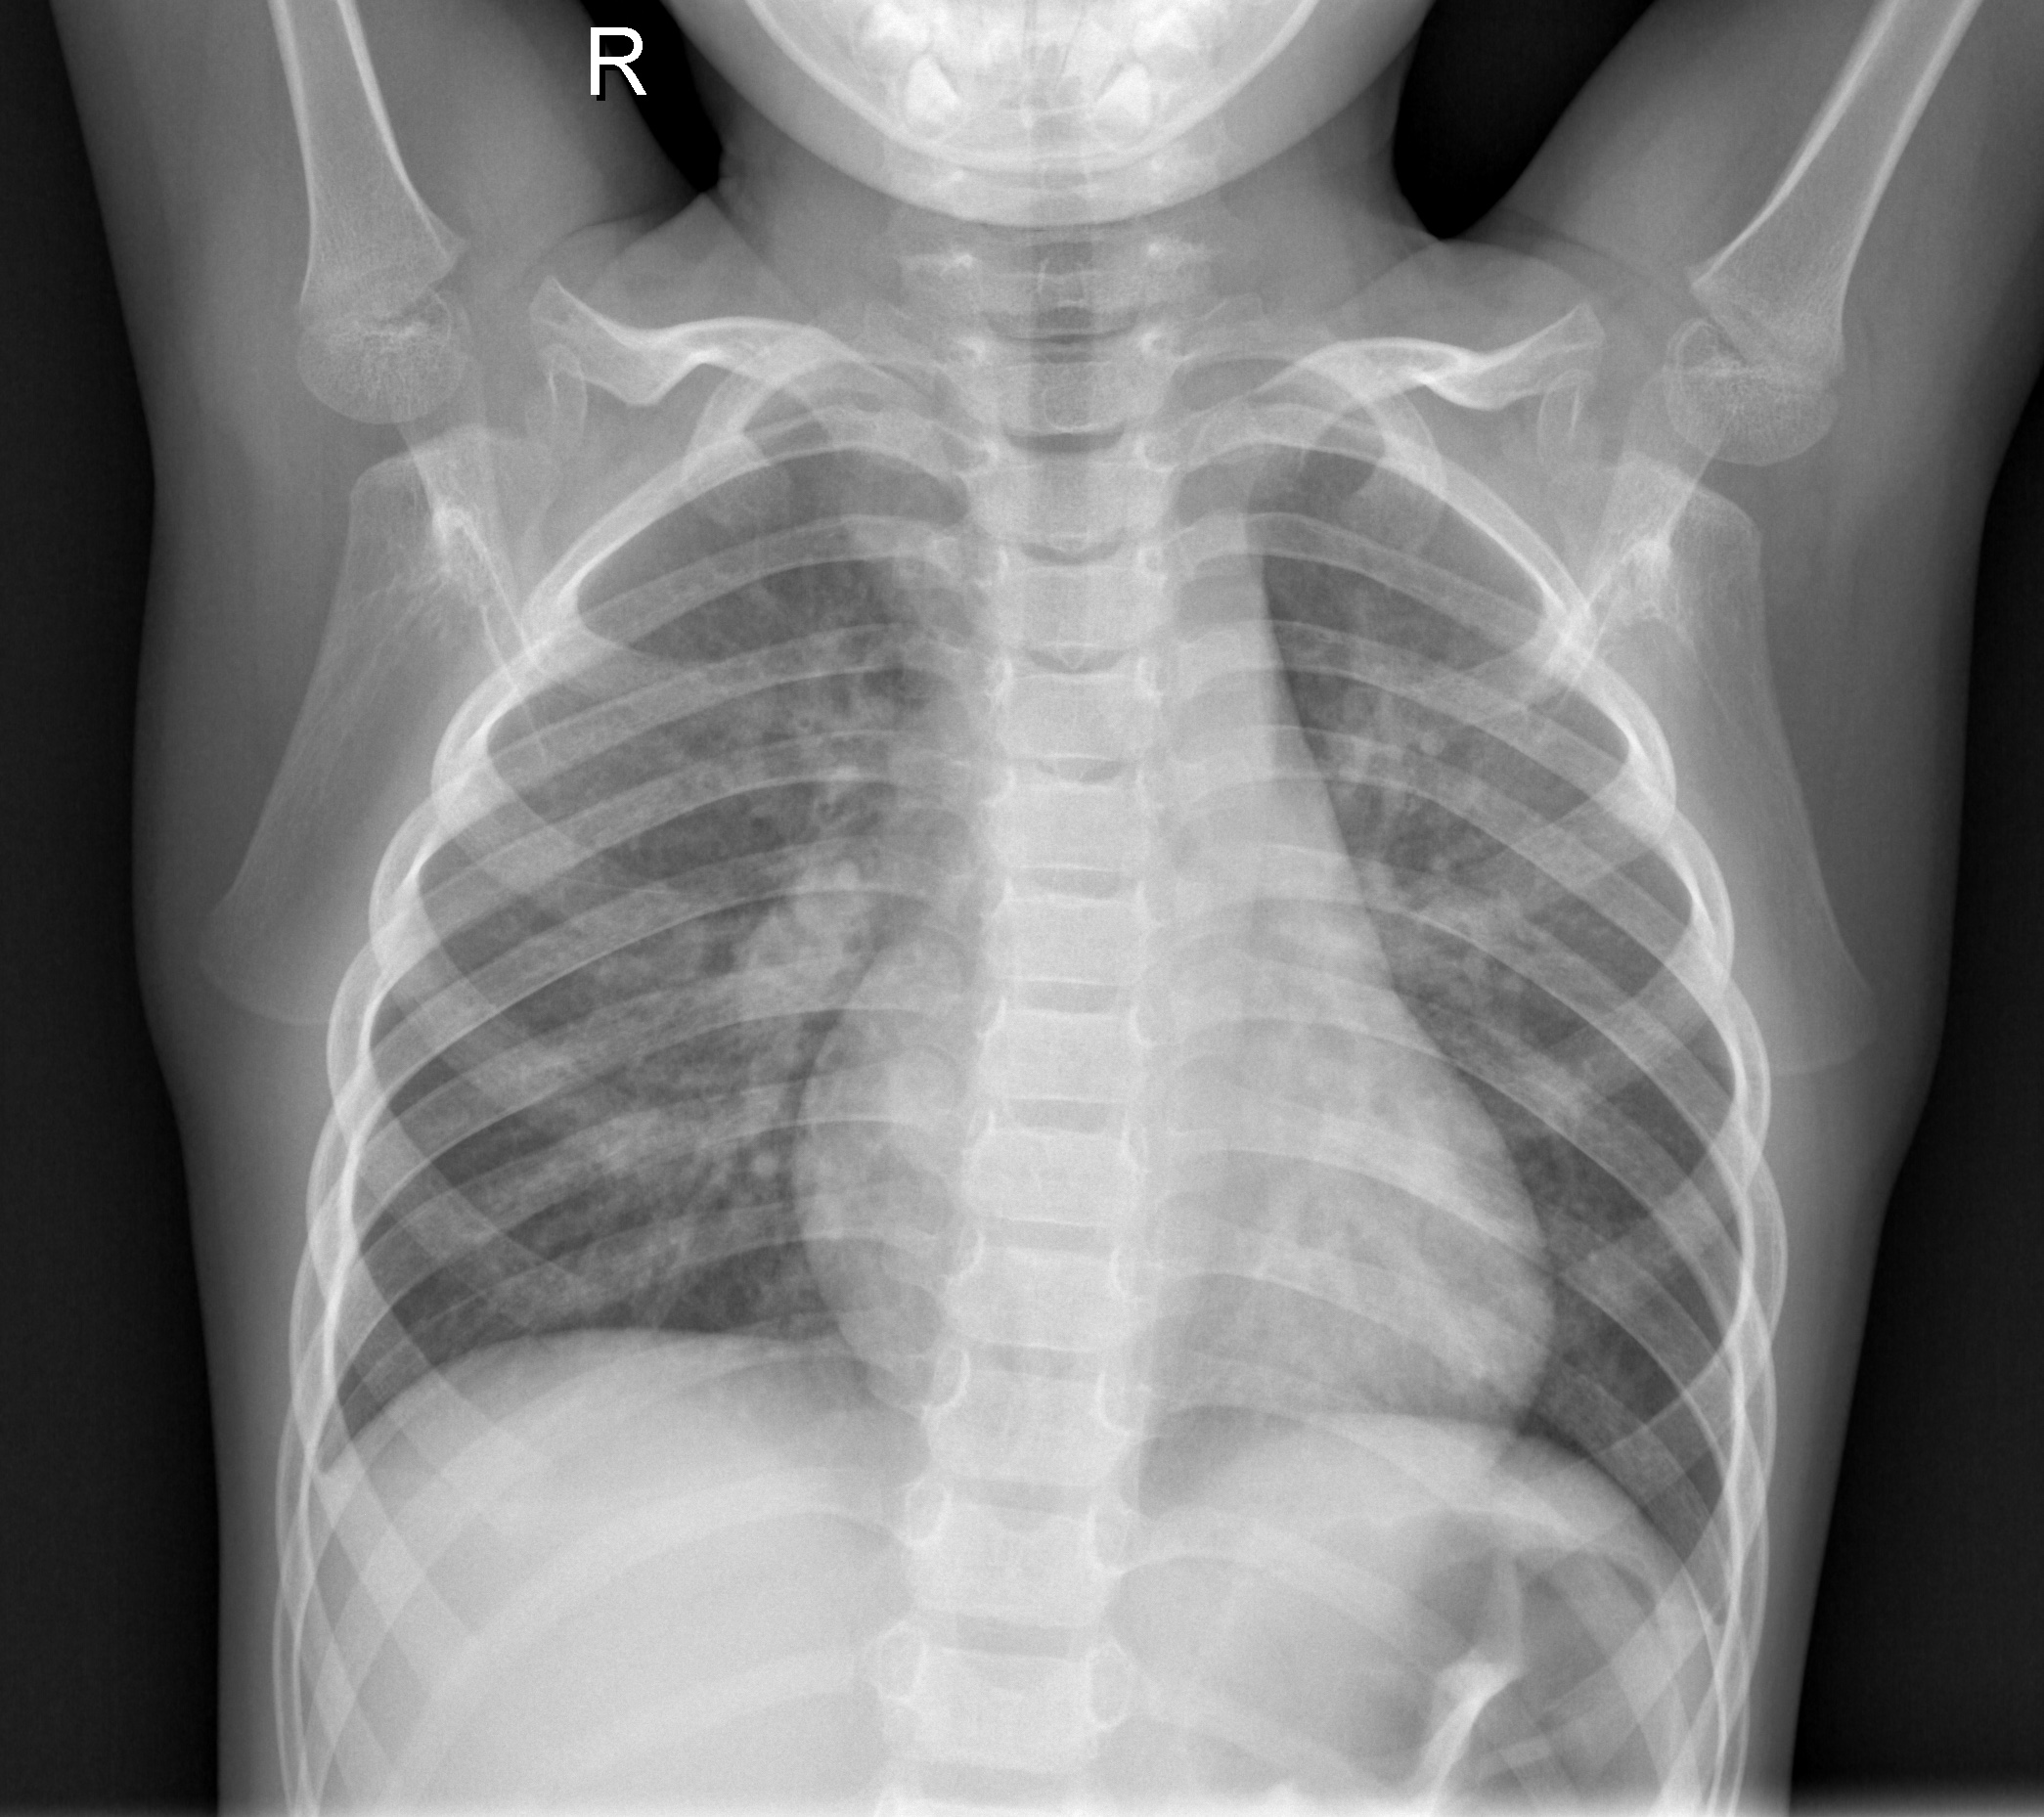

In [15]:
PIL.Image.open('/content/chest_xray/train/NORMAL/IM-0115-0001.jpeg')

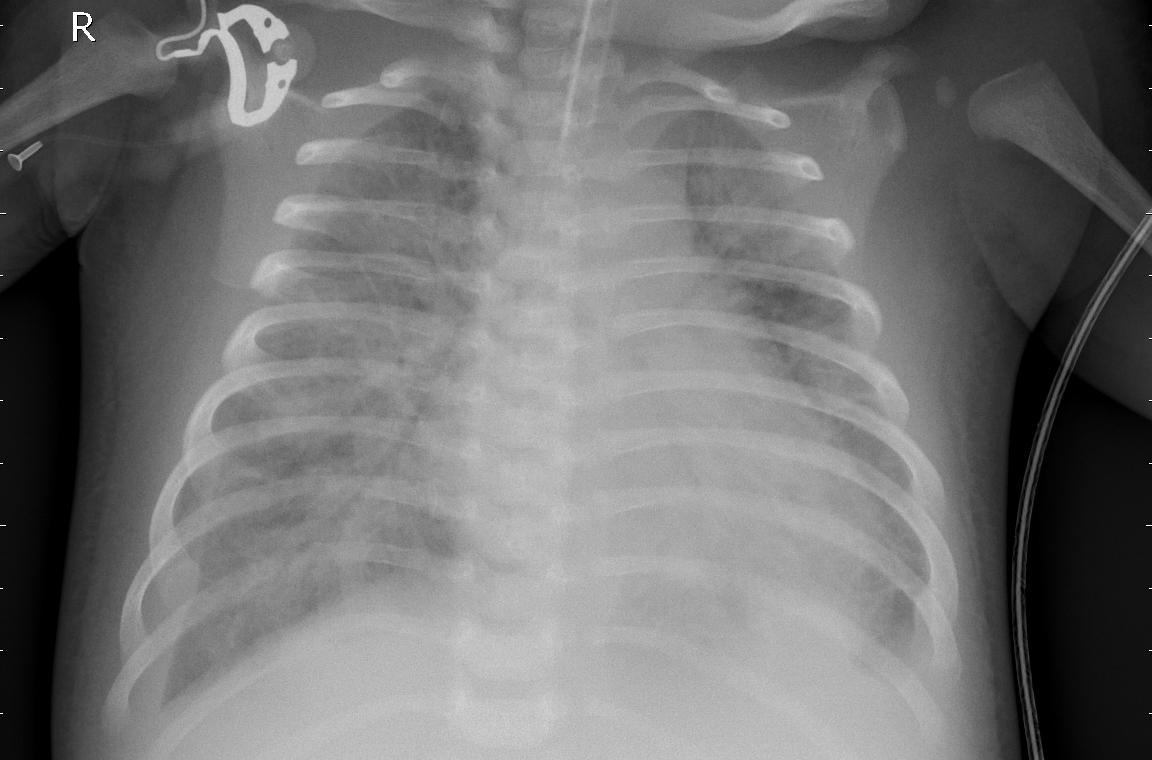

In [16]:
PIL.Image.open('/content/chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg')

In [13]:
import tensorflow as tf

In [14]:
traning_ds =  tf.keras.utils.image_dataset_from_directory(
    '/content/chest_xray/train',

    image_size=(150, 150),
    batch_size=64,
    label_mode='categorical',
    shuffle=True,



)

Found 5216 files belonging to 2 classes.


In [15]:
test_ds =  tf.keras.utils.image_dataset_from_directory(
    '/content/chest_xray/test',

    image_size=(150, 150),
    batch_size=64,
    label_mode='categorical',
    shuffle=True,



)

Found 624 files belonging to 2 classes.


In [16]:
no_batch=tf.data.experimental.cardinality(test_ds)    # number of batches
Test_ds=test_ds.take(no_batch//5)  # take part for testing
val_ds=test_ds.skip(no_batch//5)   # take for valdation after make model

In [21]:
from tensorflow.python.data.ops.dataset_ops import AUTOTUNE
AUTOTUNE=tf.data.AUTOTUNE

training_ds = traning_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
Test_ds =Test_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds= val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [93]:
model = tf.keras.Sequential([


    tf.keras.layers.Dense(32, input_shape=(150,150,3), activation='relu'),
    tf.keras.layers.Dense(64,activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(64,activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(64,activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),

    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Dropout(.25),
    tf.keras.layers.Dense(64,activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(64,activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),

    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),



    tf.keras.layers.Dropout(.25),

    tf.keras.layers.Dense(2, activation='softmax'),

])














In [94]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 150, 150, 32)      128       
                                                                 
 dense_51 (Dense)            (None, 150, 150, 64)      2112      
                                                                 
 dense_52 (Dense)            (None, 150, 150, 64)      4160      
                                                                 
 dense_53 (Dense)            (None, 150, 150, 64)      4160      
                                                                 
 batch_normalization_6 (Bat  (None, 150, 150, 64)      256       
 chNormalization)                                                
                                                                 
 dropout_10 (Dropout)        (None, 150, 150, 64)      0         
                                                      

In [95]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.001),loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),metrics='accuracy')

In [96]:
history=model.fit(traning_ds,epochs=15,validation_data=val_ds)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


82/82 [==============================] - 51s 541ms/step - loss: 47.7993 - accuracy: 0.8579 - val_loss: 77.6177 - val_accuracy: 0.6210
Epoch 2/15
82/82 [==============================] - 45s 515ms/step - loss: 15.5234 - accuracy: 0.9160 - val_loss: 10.8559 - val_accuracy: 0.7339
Epoch 3/15
82/82 [==============================] - 45s 510ms/step - loss: 7.9381 - accuracy: 0.9348 - val_loss: 9.1973 - val_accuracy: 0.6472
Epoch 4/15
82/82 [==============================] - 45s 512ms/step - loss: 7.6222 - accuracy: 0.9222 - val_loss: 7.3672 - val_accuracy: 0.8044
Epoch 5/15
82/82 [==============================] - 45s 498ms/step - loss: 6.8580 - accuracy: 0.9231 - val_loss: 11.9199 - val_accuracy: 0.6270
Epoch 6/15
82/82 [==============================] - 45s 500ms/step - loss: 6.6489 - accuracy: 0.9135 - val_loss: 6.5688 - val_accuracy: 0.6290
Epoch 7/15
82/82 [==============================] - 44s 510ms/step - loss: 5.1243 - accuracy: 0.9300 - val_loss: 5.9280 - val_accuracy: 0.7359
Epoch

In [97]:
import matplotlib.pyplot as plt

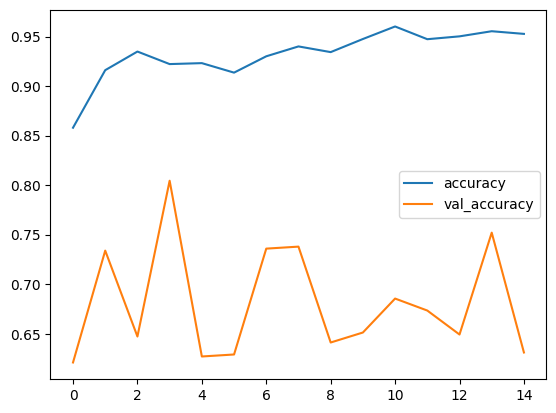

In [98]:
training_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(training_acc, label = 'accuracy')
plt.plot(val_acc, label = 'val_accuracy')
plt.legend()

In [99]:
training_acc = history.history['loss']
val_acc = history.history['val_loss']

plt.plot(training_acc, label = 'loss')
plt.plot(val_acc, label = 'val_loss')
plt.legend()

In [100]:
train_loss, train_acc = model.evaluate(traning_ds)
test_loss, test_acc = model.evaluate(val_ds)

print("fianl train accuracy = {:.2f}, validation accuracy  = {:.2f}".format(train_acc*100, test_acc*100) )

8/8 [==============================] - 4s 122ms/step - loss: 14.9438 - accuracy: 0.6149
fianl train accuracy = 74.29, validation accuracy  = 61.49


In [101]:
model.save('model_pneu2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [102]:
import numpy as np

In [103]:
emotion_dict = {0: "Normal", 1: "Pneumonia"}

(150, 150, 3)
1/1 [==============================] - 0s 277ms/step
[1.9417488e-16, 1.0]
Pneumonia


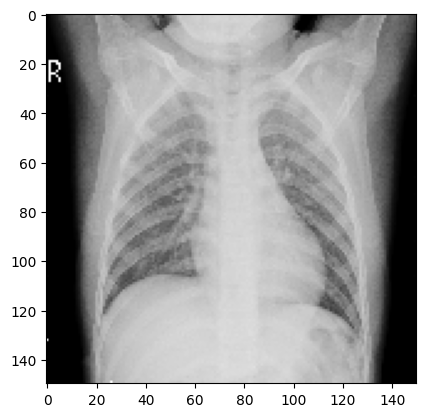

In [104]:
from keras.preprocessing import image

img = image.load_img("/content/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg",target_size = (150,150))
img = np.array(img)
plt.imshow(img)
print(img.shape) #prints (48,48) that is the shape of our image

img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,150,150,3)
result = model.predict(img)
result = list(result[0])
print(result)

img_index = result.index(max(result))
print(emotion_dict[img_index])
plt.show()

(150, 150, 3)
1/1 [==============================] - 0s 21ms/step
[3.3530083e-15, 1.0]
Pneumonia


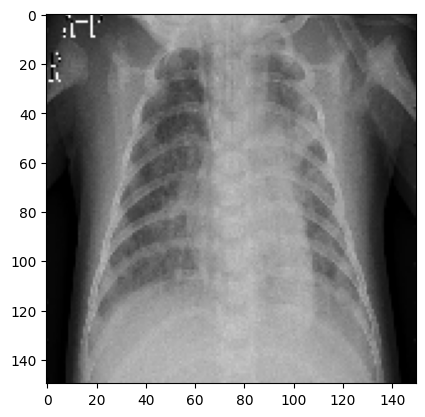

In [105]:
from keras.preprocessing import image

img = image.load_img("/content/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg",target_size = (150,150))
img = np.array(img)
plt.imshow(img)
print(img.shape) #prints (48,48) that is the shape of our image

img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,150,150,3)
result = model.predict(img)
result = list(result[0])
print(result)

img_index = result.index(max(result))
print(emotion_dict[img_index])
plt.show()

In [106]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns

In [107]:
# Extract labels from the dataset
test_labels = []
for _, label_batch in test_ds:
    test_labels.extend(tf.argmax(label_batch, axis=1))

# Convert labels to numpy array
test_labels = tf.stack(test_labels).numpy()

# Print the labels
print(test_labels)

[0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0 0
 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0
 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1
 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 0
 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1
 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 1
 1 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1
 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1
 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1 0
 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1
 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1
 0 0 1 0 0 0 0 1 0 0 1 1 

In [108]:
test_labels

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,

In [109]:
y_pred = model.predict(test_ds)

10/10 [==============================] - 4s 152ms/step


In [110]:
y_pred

array([[7.8971740e-16, 1.0000000e+00],
       [1.2129274e-08, 1.0000000e+00],
       [2.2595832e-14, 1.0000000e+00],
       ...,
       [7.0182106e-17, 1.0000000e+00],
       [1.8299269e-20, 1.0000000e+00],
       [1.8478674e-16, 1.0000000e+00]], dtype=float32)

In [111]:
y_pred = y_pred.tolist()

In [112]:
y_pred

[[7.89717404087154e-16, 1.0],
 [1.2129273585514966e-08, 1.0],
 [2.259583206578198e-14, 1.0],
 [4.038124001848331e-12, 1.0],
 [1.0619197188255214e-10, 1.0],
 [6.817594042475908e-14, 1.0],
 [2.1190301846118337e-13, 1.0],
 [7.704825034648706e-16, 1.0],
 [6.973040851329659e-14, 1.0],
 [3.203059692480359e-11, 1.0],
 [3.6580242686930914e-14, 1.0],
 [2.537034777681975e-15, 1.0],
 [4.814747961008446e-19, 1.0],
 [4.6575774407687764e-20, 1.0],
 [3.50895767335191e-20, 1.0],
 [5.420300201784776e-15, 1.0],
 [1.2056643677811662e-15, 1.0],
 [1.7593781698516564e-15, 1.0],
 [7.449348843521898e-20, 1.0],
 [7.442994381630721e-14, 1.0],
 [5.7389483790193374e-12, 1.0],
 [4.483956676289688e-18, 1.0],
 [4.2307466653581825e-16, 1.0],
 [3.312424579761653e-17, 1.0],
 [2.432267548837136e-16, 1.0],
 [2.031864539697747e-15, 1.0],
 [8.764811987305166e-09, 1.0],
 [1.1819015499689389e-17, 1.0],
 [3.869367933171567e-17, 1.0],
 [4.302077086498074e-13, 1.0],
 [2.08519281878153e-19, 1.0],
 [1.4470972921710524e-16, 1.0],


In [113]:
result = []
for img in y_pred:
  img_index = img.index(max(img))
  result.append(img_index)


result

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [114]:
y_pred = np.array(result)


In [115]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [116]:
accuracy = accuracy_score(y_pred, test_labels)

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 62.50%


In [117]:
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

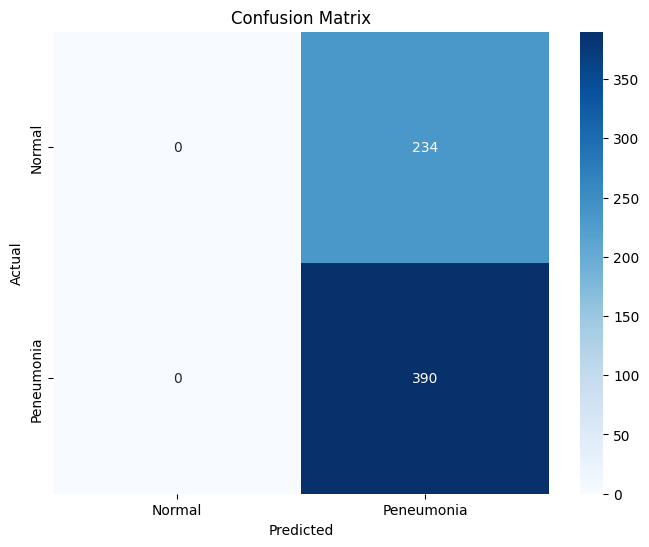

In [119]:
plot_confusion_matrix(test_labels, y_pred, class_names=["Normal", "Peneumonia"])

10/10 [==============================] - 4s 131ms/step


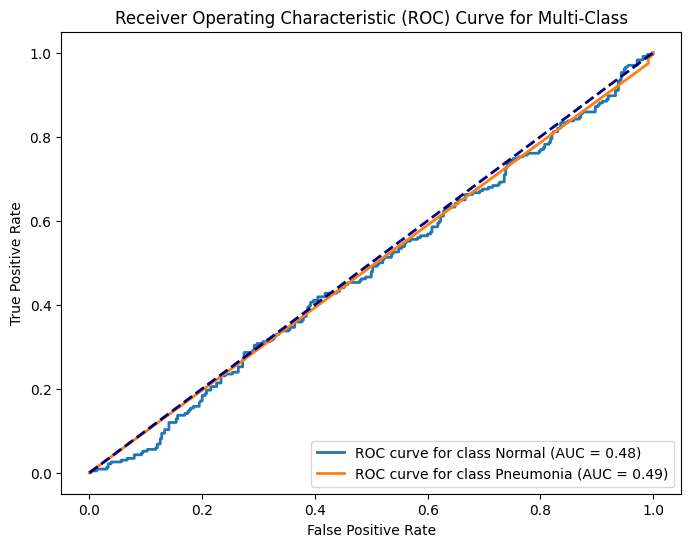

In [118]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import  roc_curve, auc

# Predict probabilities for each class
y_probs = model.predict(test_ds)
class_names=["Normal", "Pneumonia"]
# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(test_labels == i, y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(class_names)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve for class {class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Class')
plt.legend(loc='lower right')
plt.show()

In [ ]:
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,